# MTH9875 Homework 5

Assigned: September 22, 2016.
Due: October 6, 2016 by 6pm.

Late homework **will not be accepted**.

# Biya Wu

## An empirical SPX volatility surface

Friday, September 16, 2011 was triple witching day for SPX options and futures.  Thus, the volatility surface as of the close on the 15th, that includes September options expiring the following morning, should have a shape just as interesting as the one shown in Figure 3.2 of The Volatility Surface.  Indeed more interesting, because the term structure of volatility was downwards sloping.

### 1. (3 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
Derive the put-call parity formula for European options in the form

$$
C-P=PV\,(F-K)
$$ 

where $C$ is the call price, $P$ is the put price, $F$ is the forward price, $K$ is the strike and $PV$ is the discount factor.

#### Answer

$(S_T - K)^+ - (K - S_T)^+ = S_T - K$ <br\>
$\mathbb{ E}^{\mathbb{Q}}[S_T|S_t] = F$<br\>
$PV(\mathbb{ E}^{\mathbb{Q}}[(S_T - K)^+|S_t]) = C$ <br\>
$PV(\mathbb{ E}^{\mathbb{Q}}[(K - S_T)^+|S_t]) = P$ <br\>
Therefore, 
$
C-P=PV\,(F-K)
$

### Download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [38]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BlackScholes.R.zip", destfile="BlackScholes.R.zip")
unzip(zipfile="BlackScholes.R.zip")
source("BlackScholes.R")
source("Heston.R")

### 2.  (8 points) 

Given $n$ option strikes from a given expiration $T$, write R-code to take the $2\,n$ option prices and return $F$ and $PV$ for that expiration (obviously you need at least two strikes).  Test your code on the following prices for European options expiring in 36 days:

| Strike | Call price | Put price |
|--------|---------:|----------:|
| 1190 | 52.23 | 37.51 | 
| 1195 | 49.11 | 39.34 | 
| 1200 | 46.59 | 41.52 | 
| 1205 | 43.13 | 42.55 | 
| 1210 | 40.21 | 45.40 | 
| 1215 | 37.45 | 47.57 | 
  



With the resulting values of $F$ and $PV$, and using the implied volatility calculator in *BlackScholes.R*, compute implied volatilities for the above options.  Display these by adding a column to the above table.

In [39]:
Ks <- c(1190,1195,1200,1205,1210,1215)
Cs <- c(52.23,49.11,46.59,43.13,40.21,37.45)
Ps <- c(37.51,39.34,41.52,42.55,45.40,47.57)


fit_option <- function(Ks, Cs, Ps){
    y = Cs - Ps
    x = Ks
    fit = lm(y~x)
    PV = -fit$coeff[[2]]
    F = fit$coeff[[1]]/PV
    return (data.frame(F,PV))
}

res <- fit_option(Ks, Cs, Ps)

F <- res$F
PV <- res$PV
S <- F * PV
T <- 36/365.25
r <- log(PV)/(-T)


ImpVol <- rep(0,length(Ks))
for (i in 1:length(Ks)){
    ImpVol[i] = BSImpliedVolCall(S, Ks[i], T, r, Cs[i])
}

res
data.frame(Ks, Cs, Ps, ImpVol)

F,PV
1204.992,0.9918286


Ks,Cs,Ps,ImpVol
1190,52.23,37.51,0.2985838
1195,49.11,39.34,0.2951229
1200,46.59,41.52,0.2951303
1205,43.13,42.55,0.2882564
1210,40.21,45.40,0.2844133
1215,37.45,47.57,0.2810299


### Download code for problem 3.

The following code loads the file *spxData110915.rData* into your working directory and sources *plotIvols.R* which has implied volatility smile plotting functionality.

In [40]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")

source("plotIvols.R")

*spxOptionMetrics.rData* contains in particular the data frame `spxData110915` which has all SPX options closing prices as of September 15, 2011.  Data is from OptionMetrics (http://www.optionmetrics.com/index.html) via WRDS (http://wrds-web.wharton.upenn.edu/wrds/).

Note that SPX strike prices are out by a factor of 1000.

In [41]:
load("spxOptionMetrics.rData")

# Inspect the raw data
head(spxData110915[,1:10])

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer
2559920,108105,20110915,SPX 110917C100000,1,20110917,20110815,C,100000,1106.4,1110.0
2559921,108105,20110915,SPX 110917C1000000,1,20110917,20110915,C,1000000,206.4,210.0
2559922,108105,20110915,SPX 110917C1005000,1,20110917,20110829,C,1005000,200.2,204.1
2559923,108105,20110915,SPX 110917C1010000,1,20110917,20110829,C,1010000,195.2,199.1
2559924,108105,20110915,SPX 110917C1015000,1,20110917,20110912,C,1015000,190.2,194.1
2559925,108105,20110915,SPX 110917C1020000,1,20110917,20110909,C,1020000,186.5,190.1


### 3.  (20 points) 

(a)
Write a function in R called *generateIvols* that inputs *spxData110915* and outputs bid and offer implied volatilities for all strikes and expirations in a data frame that has the same format as the dataframe `spxOptData` from Lecture 5.



In [45]:
generateIvols <- function(data){
  
  exdatelist <- unique(data$exdate)
  SubIvols <- function(data,expiration){
    
    subdata <- subset(data, data$exdate == expiration)
    subdata[c("Texp","Fwd","Bid","Ask")] <- NA
    subdata$Texp <- (as.numeric(strptime(subdata$exdate, format="%Y%m%d") - strptime(subdata$date, format="%Y%m%d")))/365.25
    
    Ks <- (subdata[subdata$cp_flag == 'C',])$strike_price/1000
    Cs <- ((subdata[subdata$cp_flag == 'C',])$best_bid+(subdata[subdata$cp_flag == 'C',])$best_offer)/2
    Ps <-((subdata[subdata$cp_flag == 'P',])$best_bid+(subdata[subdata$cp_flag == 'P',])$best_offer)/2
    
    res <- fit_option(Ks, Cs, Ps)
    
    F <- res$F
    PV <- res$PV
    S <- F*PV
    T <- subdata$Texp[1]
    r <- log(PV)/(-T)
    
    BuyImpVol <- numeric(length(subdata$strike_price))
    AskImpVol <- numeric(length(subdata$strike_price))
    for (j in 1:length(subdata$strike_price)){
      if (subdata$cp_flag[j] == 'C'){
        BuyImpVol[j] = BSImpliedVolCall(S, (subdata$strike_price[j]/1000.0), T, r, (subdata$best_bid[j]))
        AskImpVol[j] = BSImpliedVolCall(S, (subdata$strike_price[j]/1000.0), T, r, (subdata$best_offer[j]))                
      } else {
        BuyImpVol[j] = BSImpliedVolPut(S, (subdata$strike_price[j]/1000.0), T, r, subdata$best_bid[j])
        AskImpVol[j] = BSImpliedVolPut(S, (subdata$strike_price[j]/1000.0), T, r, subdata$best_offer[j])
      }
    }
    subdata$Bid <- BuyImpVol
    subdata$Ask <- AskImpVol
    subdata$Fwd <- rep(F, length(subdata$strike_price))
    return (subdata)
    
  }
  
  out <- SubIvols(data,exdatelist[1])
  for (i in 2:length(exdatelist)){
    out <- rbind(out,SubIvols(data,exdatelist[i]))
  }
  
  return (out)
}

res <- generateIvols(spxData110915)
res

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,ticker,index_flag,issuer,div_convention,exercise_style,am_set_flag,Texp,Fwd,Bid,Ask
2559920,108105,20110915,SPX 110917C100000,1,20110917,20110815,C,100000,1106.4,1110.0,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,10.0000000
2559921,108105,20110915,SPX 110917C1000000,1,20110917,20110915,C,1000000,206.4,210.0,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.5116101
2559922,108105,20110915,SPX 110917C1005000,1,20110917,20110829,C,1005000,200.2,204.1,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.3494562
2559923,108105,20110915,SPX 110917C1010000,1,20110917,20110829,C,1010000,195.2,199.1,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.3188810
2559924,108105,20110915,SPX 110917C1015000,1,20110917,20110912,C,1015000,190.2,194.1,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.2883675
2559925,108105,20110915,SPX 110917C1020000,1,20110917,20110909,C,1020000,186.5,190.1,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.3925173
2559926,108105,20110915,SPX 110917C1025000,1,20110917,20110914,C,1025000,181.6,185.1,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.3597207
2559927,108105,20110915,SPX 110917C1030000,1,20110917,20110829,C,1030000,176.5,179.7,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.2795292
2559928,108105,20110915,SPX 110917C1035000,1,20110917,20110824,C,1035000,171.6,174.4,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.2092749
2559929,108105,20110915,SPX 110917C1040000,1,20110917,20110912,C,1040000,166.6,170.1,...,SPX,1,CBOE S&P 500 INDEX,I,E,1,0.005475702,1207.652,1.727596e-10,1.2615915



(b)
Plot your results using *plotIvols()*; your picture should look something like Figure 6 in the lecture slides (without the orange SVI fit of course).


$expiries
 [1] 0.005475702 0.021902806 0.041067762 0.101300479 0.178074378 0.254734200
 [7] 0.290326261 0.503764545 0.539356605 0.752908966 0.788501027 1.270476842
[13] 1.768651608 2.267054529

$atmVol
 [1] 0.1780506 0.3033734 0.2953369 0.2825833 0.2879307 0.2850244 0.2855071
 [8] 0.2800250 0.2809457 0.2760291 0.2763127 0.2687751 0.2650603 0.2633960

$atmSkew
 [1] -1.2986880 -1.2616913 -1.0916528 -0.8866618 -0.6635137 -0.6119115
 [7] -0.5418695 -0.4533004 -0.4208377 -0.3400385 -0.3527280 -0.2876428
[13] -0.2527968 -0.2051942

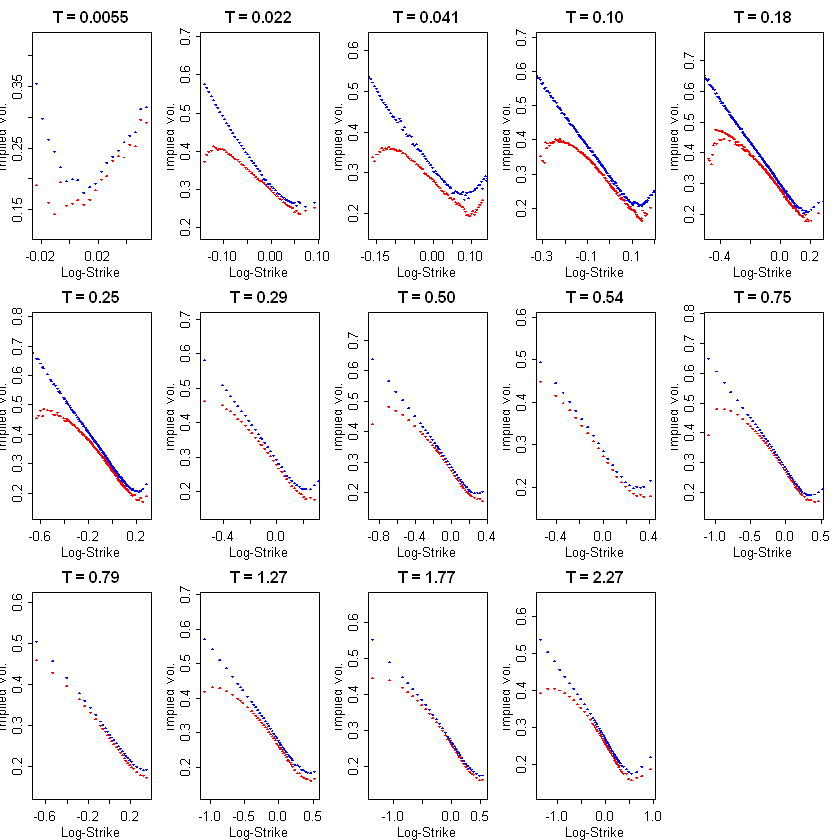

In [46]:
Bid <- res[res$cp_flag=="C",]$Bid
Ask <- res[res$cp_flag=="C",]$Ask
Fwd <- res[res$cp_flag=="C",]$Fwd
Texp <- res[res$cp_flag=="C",]$Texp
Strike <- res[res$cp_flag=="C",]$strike_price/1000

x <- Bid[length(Bid)]
for (i in 1:length(Bid)){
    if (Bid[i] == x){Bid[i] <- NA}
    if (Ask[i] == x){Ask[i] <- NA}
}

Data <- data.frame(Bid,Ask,Fwd,Texp,Strike)
Data <- Data[order(Texp,Strike),]
plotIvols(Data)


## Approximate calibration of the Heston parameters

### 4.  (26 points) 

(a)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (23) for ATM variance skew to the empirical ATM skew estimates in Table 2 of Lecture 5. 


In [47]:
skewHeston <- function(skewParams,texp){
    rhoeta <- skewParams[1]
    lam <- skewParams[2]
    lt <- lam*texp
    skew <- rhoeta/lt*(1-(1-exp(-lt))/lt)
    return(skew)
    }

texp <- c(1.0/365, 1.0/12, 2.0/12, 3.0/12, 6.0/12, 9.0/12, 15.0/12, 21.0/12, 27.0/12)
atmSkews <- c(-0.7343, -0.5164, -0.4439, -0.3741, -0.2525, -0.2122, -0.1658, -0.1339, -0.1185)

skewObjective1 <- function(skewParams){    
    skewModel <- skewHeston(skewParams,texp)
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    }



(b)
Using your code from (a) and all the points, assuming $\rho=-0.7$, estimate the Heston parameters $\lambda$ and $\eta$. How similar are your estimates the Heston parameters $\lambda$ and $\eta$ to the estimates from September 2005 listed in Table 3 of Lecture 5?  Are Heston fitted parameters stable over time?



In [50]:
rho <- -.7
res1 <- optim(c(rho*.39,1.15),skewObjective1)
fit1 <- res1$par
eta <- fit1[1] / rho
lambda <- fit1[2]
cat('lambda = ', lambda, 'eta = ', eta)

lambda =  7.996911 eta =  1.983844


(c)
Repeat (a) and (b) dropping the first expiries, as in Lecture 5.



In [51]:
skewObjective2 <- function(skewParams){
    skewModel <- skewHeston(skewParams,texp[-(1:3)])
    skewEmpirical <- atmSkews[-(1:3)]
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    }
rho <- -.7
res2 <- optim(c(rho*.39,1.15),skewObjective2)
fit2 <- res2$par
eta2 <- fit2[1] / rho
lambda2 <- fit2[2]
cat('lambda = ', lambda2, 'eta = ', eta2)


lambda =  3.772332 eta =  1.364621


(d) Fit a power law of the form $A/T^\alpha$ to the ATM variance skew data (all points).


In [52]:
skewObjectivePL <- function(alpha){
    
    skewModel <- atmSkews[5]*(texp[5]/texp)^alpha
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    }

resPL <- optim(.4,skewObjectivePL)
fitPL <- resPL$par
cat("alpha is", fitPL)

Warning message in optim(0.4, skewObjectivePL):
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"

alpha is 0.2171875



(e) 
Superimpose graphs of your resulting ATM skew fits from (b), (c), and (d) to generate a plot like Figure 8 of Lecture 5.


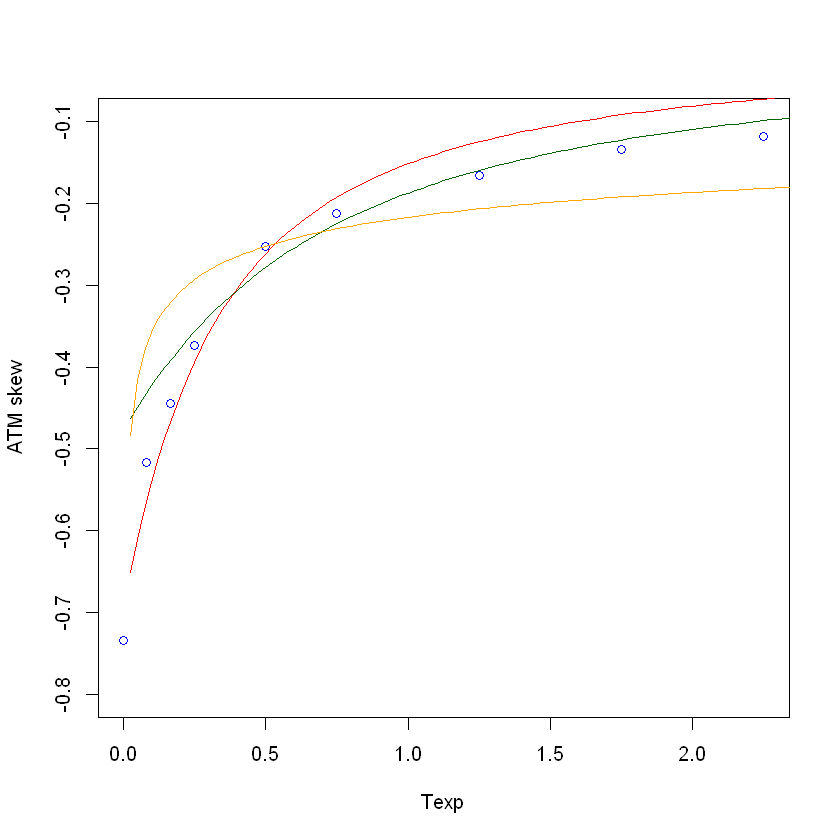

In [53]:
plot(texp,atmSkews,col="blue",ylim=c(-.8,-.1),xlab="Texp",ylab="ATM skew")
curve(skewHeston(fit1,x),from=0,to=2.5,col="red",add=TRUE)
curve(skewHeston(fit2,x),from=0,to=2.5,col="dark green",add=TRUE)
curve(atmSkews[5]*(texp[5]/x)^fitPL,from=0,to=2.5,col="orange",add=TRUE)


(f)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (20) 

$$
\left.{\sigma_{BS}(K,T)^2}\right|_{K=F_T} \approx \left( {{ v - \bar v'}}\right)\frac{1- e^{ -
\lambda' \,T}}{\lambda' \,T} + \bar v'.
$$

for ATM variance to the empirical ATM variance estimates in Table 2 of Lecture 5.


In [58]:
varHeston <- function(varParams,texp){
    
    v <- varParams[1]
    vbar <- varParams[2]
    lam <- varParams[3]
    lt <- lam*texp
    var <- vbar + (v-vbar)*(1-exp(-lt))/lt
    return(var)
    
    }
texp <- c(1.0/365, 1.0/12, 2.0/12, 3.0/12, 6.0/12, 9.0/12, 15.0/12, 21.0/12, 27.0/12)
atmVars <- c(0.0494, 0.0831, 0.0841, 0.0825, 0.0786, 0.0761, 0.0728, 0.0699, 0.0692)

varObjective <- function(varParams){
    
    varModel <- varHeston(varParams,texp[-1])
    varEmpirical <- atmVars[-1]
    obj <-sum((varModel-varEmpirical)^2)
    return(obj*1000000)
    
    }

res3 <- optim(c(0.04,0.04,1.15),varObjective)
fit3 <- res3$par
cat('v = ', fit3[1], ', vbar = ', fit3[2], ', lambda = ', fit3[3])

v =  0.08538816 , vbar =  0.0596594 , lambda =  1.208599


(g) Graph the empirical ATM variance vs time to expiration and your fit from (f) to generate a plot like Figure 9 of Lecture 5.


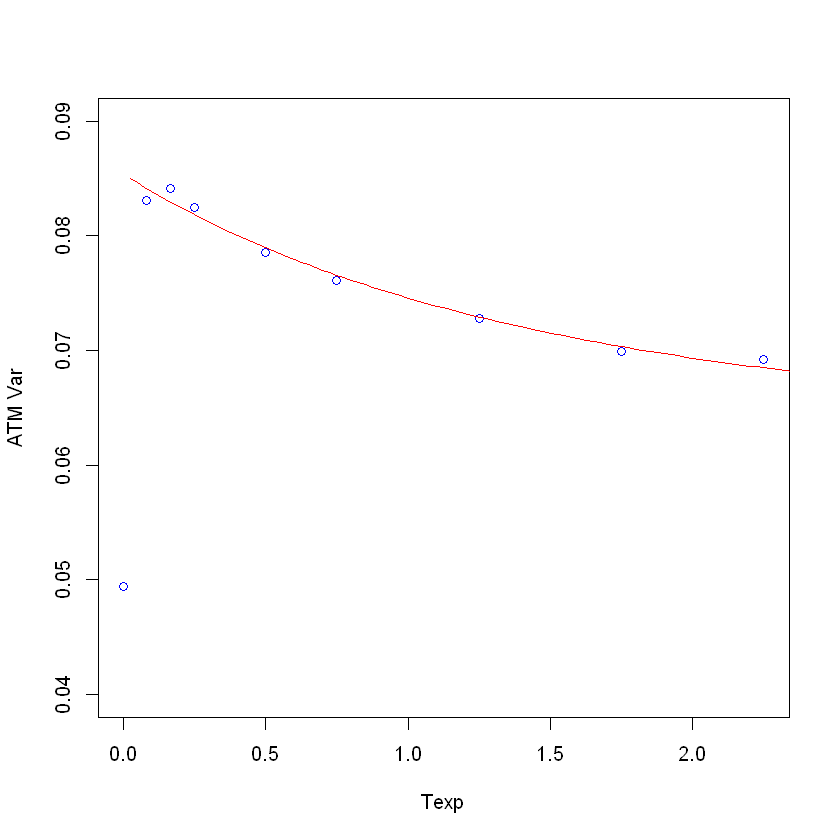

In [59]:
plot(texp,atmVars ,col="blue",ylim=c(0.04,0.09),xlab="Texp",ylab="ATM Var")
curve(varHeston(res3$par,x),from=0,to=2.5,col="red",add=TRUE)


(h)
Amend the plotIvols() code (renaming it plotIvolsHeston(..)) to take data and Heston parameters as input and superimpose Heston smiles on the empirical smiles.  Using your fitted parameters from (c) and (f) to get a picture like Figure 4 or Figure 7 of Lecture 5 (except that Heston doesn't fit!). (You may have to vectorize the *impvolHeston* function to get this to work in the iPython notebook.)


$expiries
 [1] 0.005475702 0.021902806 0.041067762 0.101300479 0.178074378 0.254734200
 [7] 0.290326261 0.503764545 0.539356605 0.752908966 0.788501027 1.270476842
[13] 1.768651608 2.267054529

$atmVol
 [1] 0.1780506 0.3033734 0.2953369 0.2825833 0.2879307 0.2850244 0.2855071
 [8] 0.2800250 0.2809457 0.2760291 0.2763127 0.2687751 0.2650603 0.2633960

$atmSkew
 [1] -1.2986880 -1.2616913 -1.0916528 -0.8866618 -0.6635137 -0.6119115
 [7] -0.5418695 -0.4533004 -0.4208377 -0.3400385 -0.3527280 -0.2876428
[13] -0.2527968 -0.2051942

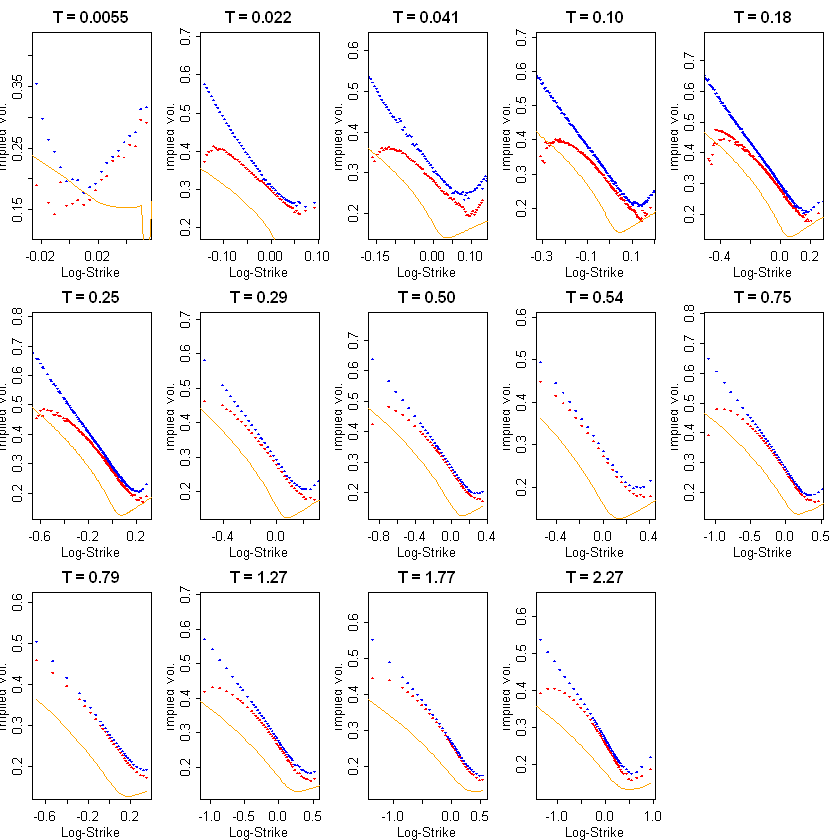

In [60]:
callHeston <- function(params){
    # redefine to modify subdivisions
    lambda <- params$lambda;
    rho <- params$rho;
    eta <- params$eta;
    vbar <- params$vbar;
    v <- params$v;
    
    res <- function(k,t){
        fj <- function(u, t, j){

            al <- -u*u/2 - 1i*u/2 + 1i*j*u;
            bet <- lambda - rho*eta*1i*u-rho*eta*j;
            gam <- eta^2/2;
            d <- sqrt(bet*bet - 4*al*gam);
            rp <- (bet + d)/(2*gam);
            rm <- (bet - d)/(2*gam);
            g <- rm / rp;
            D <- rm * (1 - exp(-d*t))/ (1 - g*exp(-d*t));
            C <- lambda * (rm * t - 2/eta^2 * log( (1 - g*exp(-(d*t)))/(1 - g) ) );
            return(exp(C*vbar + D*v));} 
        x <- -k;
        p1 <- 1/2+1/pi*integrate(function(u){Re(fj(u,t,1)*exp(1i*u*x)/(1i*u))},lower=0,upper=Inf, subdivisions=2000)$value;
        p0 <- 1/2+1/pi*integrate(function(u){Re(fj(u,t,0)*exp(1i*u*x)/(1i*u))},lower=0,upper=Inf, subdivisions=2000)$value;
        return(exp(k)*(exp(x)*p1-p0));
    }
    return(res);
}

plotIvolsHeston <- function(ivolData,sviMatrix=NULL,slices=NULL){
    
    hestonParams <- list(lambda = 7.996911,rho = -0.7,eta = 1.983844,vbar = 0.04,v = 0.04)
	bidVols <- as.numeric(ivolData$Bid);
	askVols <- as.numeric(ivolData$Ask);
	expDates <- unique(ivolData$Texp);
	nSlices <- length(expDates);
	if(!is.null(slices)) {nSlices <- length(slices)} else {slices <- 1:nSlices};
	colnum <- sqrt(nSlices*2);
	rows <- round(colnum/2,0);
	columns <- round(colnum,0);
	while(rows*columns < nSlices) {rows <- rows+1;}

	atmVol <- numeric(nSlices);
	atmSkew <-numeric(nSlices);

	###############################################################################################################
	#Plot all the slices
	par(mfrow=c(rows,columns),mex=0.5)
	for (slice in slices){
			t <- expDates[slice];
			texp <- ivolData$Texp;
			bidVol <- bidVols[texp==t];
			askVol <- askVols[texp==t];
			midVol <- (bidVol+askVol)/2;
			f <- (ivolData$Fwd[texp==t])[1];
			k <- log(ivolData$Strike[texp==t]/f); # Plot vs log-strike
			include <- !is.na(bidVol);
			kmin <- min(k[include]);
			kmax <- max(k[include]);
			ybottom <- 0.8*min(bidVol[include]);
			ytop <- 1.2*max(askVol[include],na.rm=T);
			xrange <- c(kmin,kmax);
			yrange <- c(ybottom,ytop);
        
            ivolHeston<-function(k){sapply(k,function(x){impvolHeston(hestonParams)(x,t)})}

			plot(k,bidVol,col="red",pch=18,cex=.5, xlim=xrange,ylim=yrange,main=paste("T =",format(t,digits=2,nsmall=2)),xlab="Log-Strike",ylab="Implied Vol.");
par(new=T);
plot(k,askVol,col="blue",pch=18,cex=.5,xlim=xrange,ylim=yrange,main=NA,xlab=NA,ylab=NA);
lines(k,ivolHeston(k),,col="orange",pch=18,cex=.5,xlim=xrange,ylim=yrange,main=NA,xlab=NA,ylab=NA)

			if((!is.null(sviMatrix))){
    				vol <- function(k){sqrt(svi(sviMatrix[slice,],k)/t)};
    				par(new=T);
    				curve(vol(x),from=kmin,to=kmax,col="orange",lwd=2,add=T);
				}

			# Compute and store empirical levels and skews
			kIn <- k[!is.na(midVol)];
			volIn <- midVol[!is.na(midVol)];
			volInterp <- function(xout){stinterp(x=kIn,y=volIn, xout)$y};
			atmVol[slice] <- volInterp(0);
			atmSkew[slice] <- (volInterp(0.01)-volInterp(-0.01))/0.02;
		}
	par(mfrow=c(1,1),mex=1)
	par(new=F)
	return(list(expiries=expDates,atmVol=atmVol,atmSkew=atmSkew));
}

plotIvolsHeston(Data)


(i) 
Note that the Heston smiles are consistently below the empirical smiles.  Why is that? How do Heston skews compare with empirical skews?

#### Answer
Because the Heston model is not perfect and does not take into other factors such as "jumps", which the emperical data obviously does. The skewness is actually similar in a lot of the time periods, steming from the fact that we are using ATM parameters for Heston.